In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, metrics, svm,model_selection
from IPython.display import Image
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import math
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  
import nltk

In [25]:
review_data=pd.read_csv("/home/dexterslaj/FireTablet1.csv")
review_data.head(n=3)

,ProductName,Reviews,Rating
0,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",The sales people are really nice and knowledge...,5.0
1,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Great product and service and the sales man r ...,5.0
2,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Great product and service will refer to a frie...,5.0


In [26]:
review_data.drop('ProductName',1,inplace=True)
review_data.head(n=3)

,Reviews,Rating
0,The sales people are really nice and knowledge...,5.0
1,Great product and service and the sales man r ...,5.0
2,Great product and service will refer to a frie...,5.0


In [35]:
review_data4=pd.DataFrame(columns=['Reviews','Rating'])

In [36]:
review_data5=pd.DataFrame(columns=['Reviews','Rating'])

In [39]:
i=0
for index,row in review_data.iterrows():
    if row['Rating']==4.0:
        temp1=row['Reviews']
        temp2=[temp1,4.0]
        review_data4.loc[i]=temp2
        i=i+1
        

In [40]:
print(review_data4)

                                                Reviews  Rating
0     I like this e reader, but wish the screen were...     4.0
1     This is really good if you read a lot, doesn't...     4.0
2     The Amazon Kindle is a good gift for the bookw...     4.0
3     Nice product, great price and expandable stora...     4.0
4     I bought the Amazon Kindle so I could enjoy re...     4.0
5     My fiance really enjoyes it! I would definitel...     4.0
6     The Amazon Kindle is a great device to enjoy r...     4.0
7     I love my new Kindle. The size is perfect. It ...     4.0
8     This is my first e-reader. I like it so far. E...     4.0
9     Nice basic reader. Had the first model kindle ...     4.0
10    Great way to read books available for download...     4.0
11    This devices is great for storing all my amazo...     4.0
12    This is a great product, my 8yr son is complet...     4.0
13    I am very happy with my e-reader. It is so pra...     4.0
14    This little device is great for it

In [43]:
i=0
for index,row in review_data.iterrows():
    if row['Rating']==5.0:
        temp1=row['Reviews']
        temp2=[temp1,5.0]
        review_data5.loc[i]=temp2
        i=i+1

In [44]:
print(review_data5)

                                                Reviews  Rating
0     The sales people are really nice and knowledge...     5.0
1     Great product and service and the sales man r ...     5.0
2     Great product and service will refer to a frie...     5.0
3     very good product and service will refer a fri...     5.0
4     Great selections. Hard to find assistance at t...     5.0
5     This kindle is a basic and easy to use eReader...     5.0
6     Very good reading on this good and strong qual...     5.0
7     I particularly like the fact that the text sho...     5.0
8     I purchased this product because I love to rea...     5.0
9     Excellent product very good piece strongly rec...     5.0
10    In trying to get my son to read more and thoug...     5.0
11    The Kindle is great for reading on the go when...     5.0
12    Great buy! Bought it to replace a first genera...     5.0
13    Perfect size, so easy to carry around. Long la...     5.0
14    Easy to use and similar to using a

In [46]:
print(len(review_data4.index))
print(len(review_data5.index))

3456
6482


In [47]:
x=[]
for i in range(3456):
    x.append(str(i))

In [48]:
# extracting temp vocab from review_data4
vocabulary4={'null'}
print(type(vocabulary4))
for i in range(3456):
    temp_review=review_data4.iloc[[i]]
    temp_message=str(temp_review[['Reviews']])
   # print(type(temp_message))
    tempwords=word_tokenize(temp_message)
    for w in tempwords:
        if  w  in x:
            tempwords.remove(w)
   # print (tempwords)  
    for w in tempwords:
        vocabulary4 |= set(tempwords)

<class 'set'>


In [53]:
#print(vocabulary4)
print(len(vocabulary4))

2924


In [54]:
#vectorizing all rviews in review_data4 according to vocabulary4
#using count vectors
countvect4=feature_extraction.text.CountVectorizer(vocabulary=vocabulary4)
X_cv4=countvect4.transform(review_data4['Reviews'])

In [56]:
print(type(X_cv4))
X_cv4a=X_cv4.toarray()

<class 'scipy.sparse.csr.csr_matrix'>


In [59]:
print(np.shape(X_cv4a))

(3456, 2924)


In [60]:
# count vectorize review_data5 according to vocabulary4
countvect5=feature_extraction.text.CountVectorizer(vocabulary=vocabulary4)
X_cv5=countvect5.transform(review_data5['Reviews'])

In [61]:
print(type(X_cv5))
X_cv5a=X_cv5.toarray()

<class 'scipy.sparse.csr.csr_matrix'>


In [66]:
print(np.shape(X_cv5a))

(6482, 2924)


In [64]:
from math import *

In [76]:
#let cosine similarity be DC and euclidean distance be DE
# now calculating cosine max(DC,a/DE) of each review in review4_data with each review in review5_data
simscore=np.zeros(shape=3456,dtype=float)
a=1.5 # decides the importance in terms of weihtage to e euclidean distance
for i in range(3456):
    maxscore=0.0
    for j in range(6482):
        dot=0# dot product of X_cv4*X_cv5
        mod4=0# absolute value of X_cv4        
        mod5=0# absolute value of X_cv5
        sqdiff=0# squared difference between X_cv4 and X_cv5
        for k in range(2924):            
            dot=dot+(X_cv5a.item((j,k))*X_cv4a.item((i,k)))
            mod4=mod4+(X_cv4a.item((i,k)))*(X_cv4a.item((i,k)))
            mod5=mod5+(X_cv5a.item((j,k)))*(X_cv5a.item((j,k)))
            sqdiff=sqdiff+(((X_cv5a.item((j,k)))-(X_cv4a.item((i,k))))*((X_cv5a.item((j,k)))-(X_cv4a.item((i,k)))))
        DE=sqrt(sqdiff) # euclidean distance
        DC=(dot/(0.1+(sqrt(mod4)*sqrt(mod5))))
        if(maxscore<max(DC,(a/DE))):
            maxscore=max(DC,(a/DE))
    # now we will have a final maxscore for one vector in X_cv4 w.r.t all vectors in X_cv5
    simscore[i]=maxscore

ZeroDivisionError: float division by zero

In [24]:
x=[]
for i in range(10961):
    x.append(str(i))

    
#nltk.download('punkt')    

[nltk_data] Downloading package punkt to /home/dexterslaj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
  
vocabulary={'null'}
print(type(vocabulary))
for i in range(10961):
    temp_review=review_data.iloc[[i]]
    temp_message=str(temp_review[['Reviews']])
   # print(type(temp_message))
    tempwords=word_tokenize(temp_message)
    for w in tempwords:
        if  w  in x:
            tempwords.remove(w)
   # print (tempwords)  
    for w in tempwords:
        vocabulary |= set(tempwords)

<class 'set'>


In [7]:
print(len(vocabulary))

5477


In [8]:
#import nltk
#nltk.download('stopwords')

In [9]:
# stopword removal
stopwordlist=list(stopwords.words('english'))
print(stopwordlist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
stopvocab=[]
for w in vocabulary:
   # print(w)
    if w in stopwordlist:
        continue
    else:    
        stopvocab.append(w)

In [11]:
print(len(stopvocab))

5342


In [12]:
i=0
for w in stopvocab:
    stopvocab[i]=w.lower()
    i=i+1

In [13]:
#removing digits and special charachters
j=0
for w in stopvocab:
    i=0
    temp=list(w)
    for c in temp:
        if c>='a' and c<='z':
            continue
        else:
            temp[i]=''
        i=i+1    
    stopvocab[j]="".join(temp)
    temp=[]
    j=j+1

In [14]:
print(len(stopvocab))

5342


In [15]:
# removing non english words
# SAD NEWS THAT SUPPORT FOR PYENCHANT HAS BEEN ENDED FOR ANACONDA ENVIROMENT SO NOW WE HAVE TO USE AN ALTERNATIVE IN ORDER TO REMOVE NON-ENGLISH WORDS
#import pyenchant
#d=enchant.Dict("en-us")

#enstopvocab=[]
#for w in stopvocab:
    #enstopvocab.append(w)
    
#for w in stopvocab:
    
    #if w!="" and d.check(w)==False:
        #enstopvocab.remove(w)
        

In [16]:
#nltk.download('wordnet')

In [17]:
from nltk.corpus import wordnet
enstopvocab=[]
for w in stopvocab:
    enstopvocab.append(w)
for w in stopvocab:
    if w!="" and  not wordnet.synsets(w):
        enstopvocab.remove(w)

In [18]:
print(len(enstopvocab))

3563


In [19]:
enstopvocab=list(set(enstopvocab))
print(len(enstopvocab))

2642


In [20]:
# print(enstopvocab[0]) now here is a problem that first word in enstopvocab is null so we have to remove it
enstopvocab.remove("")

In [21]:
print(len(enstopvocab))

2641


In [22]:
# making vectors 1) one hot encoding 2) count vector
# using vovab enstopvocab
# using one-hot encodeing
def messagetoonehotvector(x):    
    messagevector=np.zeros(3620,dtype=int)
    temp1=word_tokenize(x)
    temp2=[]
    #for x in temp1:
       # x=lemmatizer.lemmatize(x)
        #temp2.append(x)
    for x in temp1:
        if x in stopwordslist:
            temp1.remove(x)
            
    for x in temp1:
        if x in enstopcovab:
            i=enstopvoab.index(x)
            messagevector[i]=1
            
            
    return list(messagevector)

In [23]:
countvect_esv=feature_extraction.text.CountVectorizer(vocabulary=enstopvocab)
tfidfvect=feature_extraction.text.TfidfVectorizer()
tfidfvect_esv=feature_extraction.text.TfidfVectorizer(vocabulary=enstopvocab)

In [24]:
X_cv=countvect_esv.transform(review_data['Reviews'])

In [25]:
#X_tfidf=tfidfvect.transform(review_data['Reviews'])

In [26]:
np.shape(X_cv)

(10962, 2641)

In [27]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = model_selection.train_test_split(X_cv, review_data['Rating'], test_size=0.33, random_state=42)

In [28]:
#there is nothing in file so no NAN entry
x=np.array(y_train_cv)
count1=0
count2=0
count3=0
count4=0
count5=0
for p in x:
    if p==1:
        count1+=1
    elif p==2:
        count2+=1
    elif p==3:
        count3+=1
    elif p==4:
        count4+=1
    elif p==5:
        count5+=1
    
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)

111
101
458
2348
4326


In [29]:
#nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

In [30]:
#myfile1=open("SentiWordNet_3.0.0.txt",'r')
#myfile2=open("polaritydatabase.csv",'w')

In [31]:
#writer2=csv.writer(myfile2)

In [32]:
#csv_header=['POS','ID','POSSCORE','NEGSCORE','SYNSETTERMS','GLOSS']

In [33]:
#writer2.writerow(csv_header)

In [34]:
#writer2.writerow(['popo','2222'])
ssyn1=open('sentiwordnetsynsets1.txt','w')# this file will contain all the synsets for each word from enstopvocab

In [35]:
print(enstopvocab[0])
#enstopvocab.remove('')
print(len(enstopvocab))

showcase
2641


In [36]:
enstopvocab=list(set(enstopvocab))
print(len(enstopvocab))

2641


In [37]:
polscore2=open('polscores2.txt','w')

In [38]:
tempsyn=[]
for w in enstopvocab:
    tempsyn=swn.senti_synsets(w)
    #polscore2.write("word is "+ str(w)+" ")
    for x in tempsyn:        
        ssyn1.write((str(x)+"  "))
        polscore2.write((str(x.pos_score())+" "+str(x.neg_score())+","))
    ssyn1.write("\n")
    polscore2.write("\n")                    
    tempsyn=[]
    

In [39]:
ssyn1.close()# finally we have a record of all synsets for ech word in enstopvocab
polscore2.close()

In [40]:
# A BIG NOTE :----- WE ARE USING SENTI WORD NET INTERFACE OF NLTK THAT COMPLETELY RELIES UPON SENTI WORD NET DATABASE.
# A QUICK OVERVIEW
# CURRENTLY WE ARE FINDING THE POLARITY OF EACH WORD
# NOW AS WE KNPOW THAT EACH WORD HAS SEVERAL SYNSETS DEPENDING ON PART OF SPEECH , CONTEXTUAL USE ETC.
# SINCE THIS IS OUR FIRST APPROACH TOWARDS POLARITY CLACULATION SO WE ARE JUST TAKING AREITHMATIC AVERAGE OVER ALL THE SYNSETS OF A WORD REGARDLESS OF ITS POS  OR CONTEXTUAL USE
# WE MAY GO FOR FURTHER ADVANCEMENT OF OUR ALGO..
# the approach we are using is not weaker in any sense . TEXTBLOB a famous sentiment analysis library uses this approach
avgposscore=[]# to hold avg pos polarity score of each word
avgnegscore=[] # to hold avg neg polarity score of each word

In [41]:
temppos=0.0
tempneg=0.0
count=0
polscore2=open('polscores2.txt','r')
temp=""
templist=[]
ptemp=[]
tempsyn=[]
i=1
for temp in polscore2:
    #for line in enstopvocab:
    templist=temp.split(',')
    #if i<=10:
    #print(str(i)+"):--")
    #print(temp)
    #print("\n")
    #i=i+1    
    #tempsyn=swn.senti_synsets(x)
    #count=len(list(tempsyn))# toatl no. of synsets returned
    for x in templist:
        if len(x)!=0:
            ptemp=x.split()
            #if i<=10:        
            #print(ptemp)
            #print("\n")
            if len(ptemp)!=0:
                temppos=temppos+float(ptemp[0])
                tempneg=tempneg+float(ptemp[1])
            ptemp=[]
        
    #print (count)
    #print(type(tempsyn))
    #print(tempsyn)
   # for w in tempsyn:
        
       # print(w.pos_score())
        #temppos=temppos+w.pos_score()# total pos score
        #tempneg=tempneg+w.neg_score()# total neg score
    #print(tempos)
    #print(tempneg)
    #tempos=temppos/count
    #tempneg=tempneg/count
    avgposscore.append(temppos)
    avgnegscore.append(tempneg)
    temppos=0.0
    tempneg=0.0
    count=0
    tempsyn=[]
    templist=[]
    i=i+1
    

    

In [42]:
# now recording these avg polarity scores
#polscore1=open('polscores1.txt','w')
#polscore1.write("pos score                neg score")
#for x in range(2641):
    #polscore1.write((str(avgposscore[x])+"       "+str(avgnegscore[x])))
    #polscore1.write("\n")

#print(avgposscore)
count=0
for x in range(2641):
    temp=swn.senti_synsets(enstopvocab[x])
    count=len(list(temp))
    #print(count)
    avgposscore[x]=avgposscore[x]/count
    avgnegscore[x]=avgnegscore[x]/count
    
 

In [43]:
#print(avgposscore) 

In [44]:
# now multiplying polarity with X_cv
print(type(X_cv))
fpol=np.zeros(shape=2641,dtype=float)
np.shape(fpol)
for i in range(2641):
    fpol[i]=avgposscore[i]+((-1)*avgnegscore[i])
    

<class 'scipy.sparse.csr.csr_matrix'>


In [45]:
print(fpol)

[ 0.0625      0.25       -0.03125    ... -0.125      -0.02083333
  0.375     ]


In [95]:
X_cv1=X_cv.toarray()
#print(X_cv1)
for i in range(10962):
    for j in range(2641):
        X_cv1[i][j]=(X_cv1[i][j]*fpol[j])
        #X_cv1[i][j]=(X_cv1[i][j]*1)

In [96]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = model_selection.train_test_split(X_cv1, review_data['Rating'], test_size=0.33, random_state=42)


In [97]:
model = Sequential()
model.add(Dense(1000, input_dim=2641, activation='softmax'))
#model.add(Dense(1000, activation='softmax'))
model.add(Dense(500,activation='softmax'))
#model.add(Dense(150, activation='softmax'))
model.add(Dense(5, activation='softmax'))

In [98]:
print(np.shape(X_train_cv))

(7344, 2641)


In [99]:
#now making a matrix of size 10962*5 which will serve as a y (train label vectors) according to which the model will train
y_vec=np.zeros((10962,5),dtype=float)
for i in range(10962):
    for j in range(5):
        p=review_data['Rating'][i]
        #print(p)
        #y_vec[i][0]=p
        #y_vec[i][1]=p
        #y_vec[i][2]=p
        #y_vec[i][3]=p
        #y_vec[i][4]=p
        y_vec[i][int(p)-1]=1

In [100]:
 X_train_cv, X_test_cv, y_train_cv, y_test_cv = model_selection.train_test_split(X_cv1, y_vec, test_size=0.33, random_state=42)


In [101]:
np.shape(y_train_cv)

(7344, 5)

In [102]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
model.fit(X_train_cv,y_train_cv,epochs=5,batch_size=10)

Epoch 1/5
7344/7344 [==============================] - 48s 6ms/step - loss: 1.2205 - acc: 0.5891
Epoch 2/5
7344/7344 [==============================] - 47s 6ms/step - loss: 0.9993 - acc: 0.5891
Epoch 3/5
7344/7344 [==============================] - 47s 6ms/step - loss: 0.9767 - acc: 0.5891
Epoch 4/5
7344/7344 [==============================] - 47s 6ms/step - loss: 0.9730 - acc: 0.5891
Epoch 5/5
7344/7344 [==============================] - 47s 6ms/step - loss: 0.9722 - acc: 0.5891


In [ ]:
# now we will plot the graph (bar chart, pie chart , scatter chart) for original lqbel , predicted through polarity multiplication , predicted without polarity multiplication corresponding to test data

In [56]:
#print(y_test_cv)
print(type(y_test_cv))
print(np.shape(y_test_cv))
y_test_cv1=np.zeros(shape=3618,dtype=float)

<class 'numpy.ndarray'>
(3618, 5)


In [57]:
for i in range(3618):
    y_test_cv1[i]=y_test_cv[i][0]

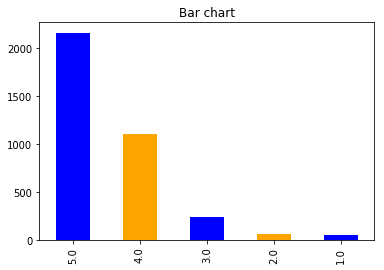

In [58]:
# for original test data
# bar chart

count_Class=pd.value_counts(y_test_cv1, sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

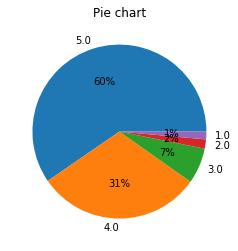

In [59]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [60]:
y_label=np.zeros(shape=5,dtype=int)
for x in y_test_cv1:
    y_label[int(x)-1]=y_label[int(x)-1]+1

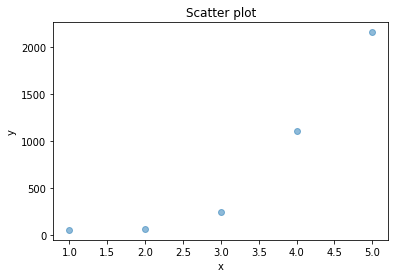

In [61]:
    
x_label=[1.0,2.0,3.0,4.0,5.0]
plt.scatter(x_label,y_label, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

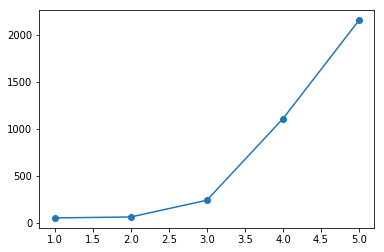

In [106]:
plt.plot(x_label,y_label,marker='o')

In [110]:
# for polarity multipied
#bar chart
pol_mul_label=model.predict_classes(X_test_cv)

In [111]:
print(np.shape(pol_mul_label))

(3618,)


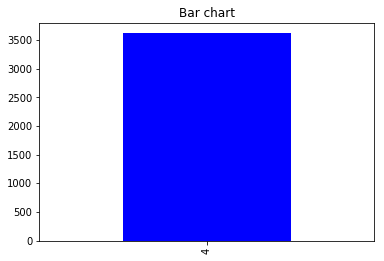

In [113]:
# bar chart

count_Class=pd.value_counts(pol_mul_label, sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

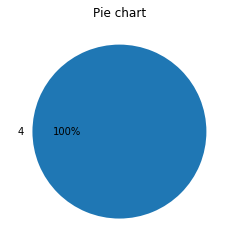

In [114]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [118]:
y_label=np.zeros(shape=5,dtype=int)
for x in pol_mul_label:
    y_label[int(x)-1]=y_label[int(x)-1]+1

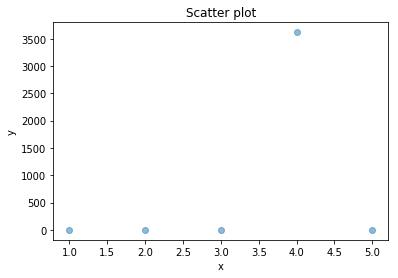

In [119]:
x_label=[1.0,2.0,3.0,4.0,5.0]
plt.scatter(x_label,y_label, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()